### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

Deliverables

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons. To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [131]:
#Read in the coupons.csv file.

data = pd.read_csv('data/coupons.csv')

In [132]:
# Clean the data

# Based on the data above, drop the cars column entirely since its not giving much meaningful information
data_clean = data.dropna(axis='columns', thresh = 250)

# Drop other rows that are containing NULLS
data_clean = data_clean.dropna()

# Add a new column with age converted to numbers
data_clean['age_clean']=data_clean['age'].str.replace('below21', 'below20',regex=True)
data_clean['age_clean']=data_clean['age_clean'].str.replace('[a-zA-Z]', '',regex=True)
data_clean['age_clean']=data_clean['age_clean'].astype(int)


data_clean=data_clean.rename(columns = {'passanger':'passenger'})

**Investigating the CarryAway Coupons**

Now, we will lead you through an exploration of just the "Carry out & Take away" related coupons.  
 
1. Create a new `DataFrame` that contains just the "Carry out & Take away" coupons.

In [133]:
data_carryout_coupons = data_clean.query('coupon == "Carry out & Take away"')
data_carryout_coupons.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,21
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,1,21
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,21
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,1,46
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,1,46


2. What proportion of "Carry out & Take away" coupons were accepted?

In [134]:
# Count the values of 0 & 1 in the dataset
accept_coupon_counts_carryout=data_carryout_coupons.Y.value_counts()
accept_coupon_counts_carryout

1    1682
0     598
Name: Y, dtype: int64

In [135]:
#Proportion of the total observations chose to accept the coupon can be calculated by doing 
# ratio of people with Y=1 divided by total counts
accept_coupon_proportion_carryout=accept_coupon_counts_carryout[1]/(accept_coupon_counts_carryout[0]+accept_coupon_counts_carryout[1])
accept_coupon_proportion_carryout

0.737719298245614

### Proportion accepted

The proportion of patrons accepting the carryout coupon is {{accept_coupon_proportion_carryout}}, which is approx. 30% more than that of patrons accepting the bar coupons.



3. Compare the acceptance rate between those who did a carryout 3 or fewer times a month to those who went more.


In [136]:
carryout_less_than_3=["never","less1","1~3"]

data_carryout_coupons_less_3 = data_carryout_coupons.query('CarryAway in @carryout_less_than_3' )
data_carryout_coupons_less_3.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,1,46
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,1,46
63,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,46,Single,...,1~3,1~3,never,1,0,0,1,0,1,46
68,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1,1,0,0,1,1,46
72,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Married partner,...,1~3,1~3,less1,1,1,0,0,1,1,46


In [137]:

# Count the values of 0 & 1 in the dataset
accept_coupon_counts_carryout_less_3=data_carryout_coupons_less_3.Y.value_counts()
accept_coupon_counts_carryout_less_3

1    869
0    332
Name: Y, dtype: int64

In [138]:
#Proportion of the total observations chose to accept the coupon can be calculated by doing 
# ratio of people with Y=1 divided by total counts
accept_coupon_proportion_carryout_less_3=accept_coupon_counts_carryout_less_3[1]/(accept_coupon_counts_carryout_less_3[0]+accept_coupon_counts_carryout_less_3[1])
accept_coupon_proportion_carryout_less_3

0.723563696919234

In [139]:
data_carryout_coupons_morethan_3 = data_carryout_coupons.query('CarryAway in ("4~8","gt8")')
data_carryout_coupons_morethan_3.head()


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,21
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,1,21
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,21
113,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Unmarried partner,...,4~8,1~3,less1,1,1,0,0,1,0,26
121,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,1,0,0,1,1,26


In [140]:

# Count the values of 0 & 1 in the dataset
accept_coupon_counts_carryout_gt_3=data_carryout_coupons_morethan_3.Y.value_counts()
accept_coupon_counts_carryout_gt_3


1    813
0    266
Name: Y, dtype: int64

In [141]:
#Proportion of the total observations chose to accept the coupon can be calculated by doing 
# ratio of people with Y=1 divided by total counts
accept_coupon_proportion_carryout_gt_3=accept_coupon_counts_carryout_gt_3[1]/(accept_coupon_counts_carryout_gt_3[0]+accept_coupon_counts_carryout_gt_3[1])
accept_coupon_proportion_carryout_gt_3


0.7534754402224282

### Conclusion #3

Acceptance rate between those who did carryout 3 or fewer times a month is {{accept_coupon_proportion_carryout_less_3}}. For patrons who did more carryout the acceptance rate is {{accept_coupon_proportion_carryout_gt_3}}. 

This shows that the number of times you carryout changes your likelyhood of claiming the coupon changes by a very small percentage

4. Compare the acceptance rate between drivers who do carryout more than once a month and are under the age of 25 to the all others.  Is there a difference?

In [142]:
carryout_more_than_1=["1~3"]

data_carryout_coupons_more_1_gt25 = data_carryout_coupons.query('CarryAway in @carryout_more_than_1 and age_clean < 25' )
data_carryout_coupons_more_1_gt25.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
91,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,1~3,less1,1~3,1,1,0,0,1,1,21
99,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,1~3,less1,1~3,1,1,0,0,1,1,21
107,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,1~3,less1,1~3,1,0,0,1,0,1,21
217,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,1~3,1~3,1,1,0,0,1,1,21
221,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,1~3,1~3,1~3,1,1,0,0,1,1,21


In [143]:
data_carryout_coupons_more_1_gt25.CarryAway.value_counts()

1~3    230
Name: CarryAway, dtype: int64

In [144]:
data_carryout_coupons_more_1_gt25.age_clean.value_counts()

21    180
20     50
Name: age_clean, dtype: int64

In [145]:

# Count the values of 0 & 1 in the dataset
accept_coupon_counts_carryout_more_1=data_carryout_coupons_more_1.Y.value_counts()
accept_coupon_counts_carryout_more_1

1    614
0    216
Name: Y, dtype: int64

In [146]:
#Proportion of the total observations chose to accept the coupon can be calculated by doing 
# ratio of people with Y=1 divided by total counts
accept_coupon_proportion_carryout_more_1=accept_coupon_counts_carryout_more_1[1]/(accept_coupon_counts_carryout_more_1[0]+accept_coupon_counts_carryout_more_1[1])
accept_coupon_proportion_carryout_more_1

0.7397590361445783

Conclusion #4

Acceptance rate for patrons under age 25 is very similar to overall rate ({{accept_coupon_proportion_carryout_more_1}} vs {{accept_coupon_proportion_carryout}}). So age may not be a big factor for carryout

5. Check correlation between various variables and see if any insights can be derived?

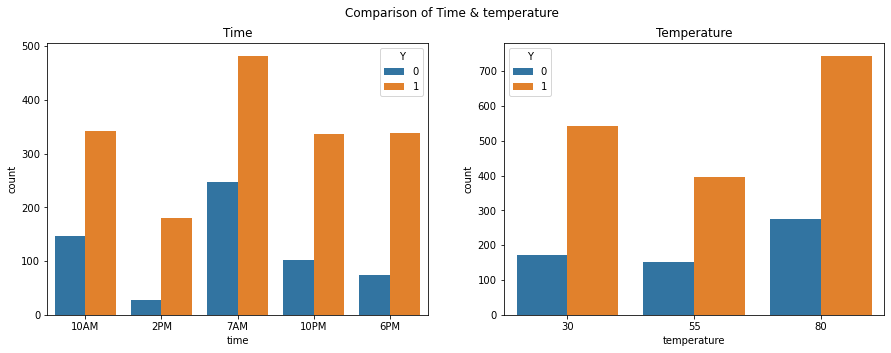

In [147]:
fig, ax =plt.subplots(1,2,sharex=False, figsize=(15,5))
chart1 = sns.countplot(data = data_carryout_coupons, x='time', ax=ax[0], hue = 'Y')
chart2 = sns.countplot(data = data_carryout_coupons, x ='temperature', ax=ax[1], hue = 'Y')
fig.suptitle('Comparison of Time & temperature')
fig.axes[0].set_title('Time')
fig.axes[1].set_title('Temperature')
plt.show()
fig.savefig("images/time_temp_distribution_carryoutcoupons.png")


The coupons for carryout are accepted more at 7am compared to another time.  Also, when temperature is high the coupon is utilized more. 



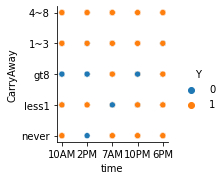

In [148]:
sns.pairplot(x_vars=['time'], y_vars=['CarryAway'], data=data_carryout_coupons, hue='Y').figure.savefig("images/carryawaycoupons_time_corr.png")

In [149]:
sns.pairplot(x_vars=['temperature'], y_vars=['CarryAway'], data=data_carryout_coupons, hue='Y')..figure.savefig("images/carryawaycoupons_temp_corr.png")

SyntaxError: invalid syntax (1205877681.py, line 1)

In [ ]:
sns.pairplot(data_carryout_coupons, hue='Y', height=2.5);

In [ ]:
sns.countplot(data = data_carryout_coupons, x='direction_opp', hue = 'Y')

In [ ]:
sns.countplot(data = data_carryout_coupons, y='income', hue = 'Y').figure.savefig("images/carryawaycoupons_income_corr.png")


In [ ]:
sns.countplot(data = data_carryout_coupons, x='gender', hue = 'Y')


In [ ]:
sns.countplot(data = data_carryout_coupons, y='maritalStatus', hue = 'Y').figure.savefig("images/carryawaycoupons_maritalstatus_corr.png")


In [ ]:
sns.countplot(data = data_carryout_coupons, y='education', hue = 'Y').figure.savefig("images/carryawaycoupons_maritalstatus_corr.png")


In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(data = data_carryout_coupons, y='occupation', hue = 'Y').figure.savefig("images/carryawaycoupons_occupation_corr.png")


In [ ]:
sns.countplot(data = data_carryout_coupons, y='toCoupon_GEQ25min', hue = 'Y').figure.savefig("images/carryawaycoupons_toCoupon_GEQ25min_corr.png")


In [ ]:
sns.countplot(data = data_carryout_coupons, y='toCoupon_GEQ15min', hue = 'Y').figure.savefig("images/carryawaycoupons_toCoupon_GEQ15min_corr.png")

In [ ]:
sns.countplot(data = data_carryout_coupons, y='toCoupon_GEQ5min', hue = 'Y').figure.savefig("images/carryawaycoupons_toCoupon_GEQ5min_corr.png")

In [ ]:
sns.countplot(data = data_carryout_coupons, y='RestaurantLessThan20', hue = 'Y').figure.savefig("images/carryawaycoupons_toRestaurantLessThan20_corr.png")

In [ ]:
sns.countplot(data = data_carryout_coupons, y='Restaurant20To50', hue = 'Y').figure.savefig("images/carryawaycoupons_toRestaurant20To50_corr.png")